In [2]:
import pandas as pd
#récupération du df nettoyé
data = pd.read_pickle("data_cleaned.pkl")



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype               
---  ------                      --------------  -----               
 0   EmpID                       311 non-null    int64               
 1   GenderID                    311 non-null    int64               
 2   PerfScoreID                 311 non-null    int64               
 3   Salary                      311 non-null    int64               
 4   PositionID                  311 non-null    int64               
 5   Position                    311 non-null    object              
 6   State                       311 non-null    object              
 7   Zip                         311 non-null    int64               
 8   DOB                         311 non-null    datetime64[ns]      
 9   DateofHire                  311 non-null    date32[day][pyarrow]
 10  DateofTermination           104 non-null    date32

# Projet 2 : Explorer et comprendre les performances des employés  

## Problématique métier:  
Une entreprise souhaite analyser la répartition des performances des employés pour comprendre les écarts et identifier les outliers.  
  
  
## Objectif:  
Étudier les distributions des scores de performance et des heures travaillées pour détecter les facteurs d'amélioration.

## Etapes: 
1/Exploration du fichier et nettoyage des données.==>Fait  
2/Choix des indicateurs  
3/Statistiques descriptives : Moyenne, médiane, mode, quartiles, variance, écart-type.  
4/Visualisation des distributions : Histogrammes, boxplots, pie chart, diagramme en barre.  
5/Détection et analyse des outliers avec la règle des 1.5 * IQR.

règle des 1.5IQR: La valeur est un outlier si :
Inférieure à Q1 - 1.5 * IQR
Supérieure à Q3 + 1.5 * IQR

In [4]:
stats_descriptives=data.describe()
stats_descriptives

,EmpID,GenderID,PerfScoreID,Salary,PositionID,Zip,DOB,DateofHire,DateofTermination,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311,311,104,311.000000,311.000000,311.000000,311.000000,311,311.000000,311.000000
mean,10156.000000,0.434084,2.983923,69020.684887,16.845659,6555.482315,1979-02-06 09:48:02.315112544,2013-02-03,2015-06-14,15.199357,4.110000,3.890675,1.218650,2017-09-10,0.414791,10.237942
min,10001.000000,0.000000,1.000000,45046.000000,1.000000,1013.000000,1951-01-02 00:00:00,2006-01-09,2010-08-30,1.000000,1.120000,1.000000,0.000000,2010-07-14,0.000000,1.000000
25%,10078.500000,0.000000,3.000000,55501.500000,18.000000,1901.500000,1973-12-03 00:00:00,2011-07-11,2014-01-10,10.000000,3.690000,3.000000,0.000000,2016-03-19,0.000000,5.000000
50%,10156.000000,0.000000,3.000000,62810.000000,19.000000,2132.000000,1980-09-30 00:00:00,2013-02-18,2015-09-22,16.000000,4.280000,4.000000,0.000000,2019-01-16,0.000000,10.000000
75%,10233.500000,1.000000,3.000000,72036.000000,20.000000,2355.000000,1986-05-29 12:00:00,2014-09-23,2016-09-08,19.500000,4.700000,5.000000,0.000000,2019-02-04,0.000000,15.000000
max,10311.000000,1.000000,4.000000,250000.000000,30.000000,98052.000000,1992-08-17 00:00:00,2018-07-09,2018-11-10,39.000000,5.000000,5.000000,8.000000,2019-02-28,6.000000,20.000000
std,89.922189,0.496435,0.576193,25156.636930,6.223419,16908.396884,NaN,NaN,NaN,8.864507,0.789938,0.909241,2.349421,NaN,1.294519,5.852596


### Choix des indicateurs :  
L'entreprise cherche à connaître les performances des employés:  
Ici nous avons la variable 'PerfScoreID' qui va mesurer la performance.  
Pour chercher les facteurs pouvant impacter la performance on a 'EmpSatisfaction','EngagementSurvey'.  C'est indicateurs pourront eux mêmes être corrélés avec 'Absences', 'DaysLateLast30', 'SpecialProjectsCount','ManagerID', 'Salary' et 'PositionID'.	

####  Choix indicateurs:  
##### Performance: 
**Mise en contexte :**  
* Nombre d'employés  
* Nombre d'embauches/ Nombre de départs sur cette année
* Ancienneté moyenne  
  
**Mesure de la performance:**  
* Stats descriptives et identification des outliers ==> boîte à moustache  
* Affichage des meilleurs performers et moins bons  
* % des employés avec un score de 3 ou 4.  (objectif 3)
* % des employés avec un score de 1.  
* Affichage de la distribution des performances.  
  
**Mesure de la satisfaction et engagement:**  
* Stats descriptives et identification des outliers ==> boîte à moustache  
* % des employés avec un score de 4 ou 5.  
* % des employés avec un score de 2 ou 1.  
* Affichage de la distribution de l'engagement et la satisfaction.  
  
**Mise en corrélation:**  
* Corrélation performance, satisfation, engagement. Déterminer des objectifs pour obtenir la performance de voulue.  
* Engagement et absences, retards, nombre de projets, manageur, salaire (comparer avec la moyenne nationale) et poste.  
* Monter l'impact sur les absences et retards (avec des %)  
* Proposer de des léviers pour améliorer les perf. (Pareto)  
  





In [5]:
#Mise en contexte
#nombre employés
nombre_employés=len(data['EmpID'])

#embauches départs sur 2018
date_référence_N=pd.to_datetime('01/01/2018')
nombre_embauches_N=len(data.loc[data['DateofHire']>date_référence_N])
nombre_departs_N=len(data.loc[data['DateofTermination']>date_référence_N])
rapport_embauches_departs_N=nombre_embauches_N/nombre_departs_N

#ancienneté moyenne
# Convertir les colonnes en datetime64 (Pandas standard)
data['DateofHire'] = pd.to_datetime(data['DateofHire'])
data['DateofTermination'] = pd.to_datetime(data['DateofTermination'])

# Calcul de la séniorité
data['Seniority'] = (data['DateofTermination'] - data['DateofHire']).where(
    data['DateofTermination'].notna(),
    pd.to_datetime('today') - data['DateofHire']
).dt.days  # Convertit en nombre de jours

ancienete_moyenne_annees=round((data['Seniority']).mean()/365.25,2)


In [6]:
#Performance
data.iloc[:,2:3].describe().round(2)



,PerfScoreID
count,311.00
mean,2.98
std,0.58
min,1.00
25%,3.00
50%,3.00
75%,3.00
max,4.00


In [7]:
import seaborn as sns
import matplotlib
#effectifs pour chaque score
effectif_score_performance=data.groupby('PerfScoreID')['PerfScoreID'].count()
effectif_score_performance=effectif_score_performance.reset_index(name='count')
effectif_score_performance

#ID des employés avec un score de 1 encore en entreprise
under_performers=data.loc[data['PerfScoreID']<2, ['EmpID']]
percent_under_performers=len(under_performers)/nombre_employés

top_performers=data.loc[data['PerfScoreID']==4, ['EmpID']]
performers_on_aim=data.loc[data['PerfScoreID']>3, ['EmpID']]
percent_performers_on_aim=len(performers_on_aim)/nombre_employés





C:\Users\mlleI\AppData\Local\Temp\ipykernel_4172\101735392.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=effectif_score_performance, x="PerfScoreID",width=.2, palette="viridis", ax=axes[0, 0])


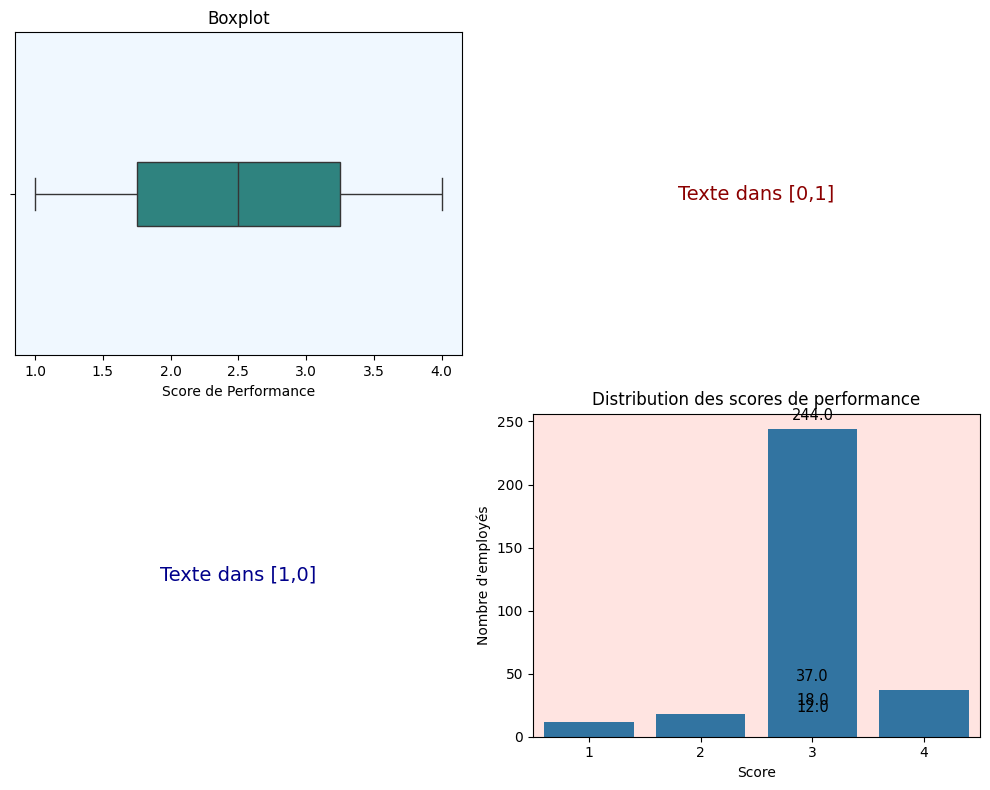

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns



# Créer la figure et les axes (4 zones : 2 lignes et 2 colonnes)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Graphique 1 : Boxplot (Boîte à moustaches)
sns.boxplot(data=effectif_score_performance, x="PerfScoreID",width=.2, palette="viridis", ax=axes[0, 0])
axes[0, 0].set_title('Boxplot')
axes[0, 0].set_xlabel('Score de Performance')  # Titre de l'axe X
axes[0, 0].set_facecolor('#f0f8ff')  # Couleur de fond

# Graphique 2 : Affichage de texte uniquement
axes[0, 1].axis('off')  # On désactive l'axe pour qu'il n'y ait pas de graphique
axes[0, 1].text(0.5, 0.5, f'Texte dans [0,1]', ha='center', va='center', fontsize=14, color='darkred')

# Graphique 3 : Affichage de texte uniquement
axes[1, 0].axis('off')  # On désactive l'axe pour qu'il n'y ait pas de graphique
axes[1, 0].text(0.5, 0.5, 'Texte dans [1,0]', ha='center', va='center', fontsize=14, color='darkblue')

# Graphique 4 : Histogramme
sns.barplot(data=effectif_score_performance, x='PerfScoreID', y='count', ax=axes[1, 1])
axes[1, 1].set_title('Distribution des scores de performance')
axes[1, 1].set_xlabel('Score')  # Titre de l'axe X
axes[1, 1].set_ylabel('Nombre d\'employés')  # Titre de l'axe Y
axes[1, 1].set_facecolor('#ffe4e1')  # Couleur de fond
# Affichage des étiquettes sur chaque barre
for p in axes[1,1].patches:
    # Position des étiquettes (sur chaque barre)
    axes[1,1].annotate(f'{p.get_height()}',  # Valeur formatée
                (2., p.get_height()),  # Coordonnée ( y) de l'étiquette
                ha='center',  # Alignement horizontal au centre
                va='center',  # Alignement vertical au centre
                fontsize=10.5,  # Taille de la police
                color='black',  # Couleur de l'étiquette
                xytext=(0, 10),  # Décalage de l'étiquette par rapport à la barre
                textcoords='offset points')  # Utiliser les coordonnées relatives à la barre

# Ajuster les espacements
plt.tight_layout()

# Afficher la figure
plt.show()
